# 数字認識

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape # (42000, 785)

(42000, 785)

In [4]:
# 欠損値があるかどうかの判定
# 列での欠損値の合計
train_null = train.isnull().sum()
train_null

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
train_null_sum = train_null.sum()
print(train_null_sum)

0


In [6]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)

c:\users\haruk\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


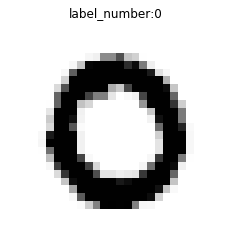

In [8]:
import numpy as np
import matplotlib.pyplot as plt
X_train_img = X_train.iloc[1].as_matrix()
X_train_img = X_train_img.reshape((28,28))
plt.imshow(X_train_img, cmap = 'Greys')
plt.axis('off')
plt.title("label_number:" + str(Y_train.iloc[1]))
plt.show()

# ランダムフォレストを用いた学習

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

In [10]:
X_test = test
predicted_numbers = rfc.predict(X_test)
predicted_numbers

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

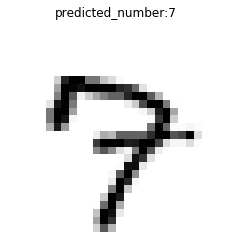

In [11]:
i=5
# X_test_img = X_test.iloc[i].as_matrix()
X_test_img = X_test.iloc[i].values
X_test_img = X_test_img.reshape((28,28))
plt.imshow(X_test_img, cmap = 'Greys')
plt.axis('off')
plt.title("predicted_number:" + str(predicted_numbers[i]))
plt.show()

In [12]:
results_data = pd.DataFrame({'ImageId': range(1, len(predicted_numbers)+1),
                             'Label': predicted_numbers})
results_data.to_csv('results.csv', sep=',', index=False)